# Maps using Functions  

In [12]:
# the usuals
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx

# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

# import that interact library
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [13]:
# Import simplified Califrnia Conservation Easement Database shapefile 

CCED = gpd.read_file('../data/CCED_simple/CCED_California_Conservation_Easement_Database.shp')
CCED.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12297 entries, 0 to 12296
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ease_label  12297 non-null  object  
 1   sitename    12297 non-null  object  
 2   esmthldr    12297 non-null  object  
 3   eholdtyp    12297 non-null  object  
 4   pubaccess   12297 non-null  object  
 5   duration    12274 non-null  object  
 6   comments    1201 non-null   object  
 7   projectid   120 non-null    object  
 8   dtmboardap  201 non-null    object  
 9   county      12297 non-null  object  
 10  src_align   12297 non-null  object  
 11  src_attr    12235 non-null  object  
 12  cced_id     12297 non-null  int64   
 13  gis_acres   12297 non-null  float64 
 14  year_est    12297 non-null  int64   
 15  term        12297 non-null  int64   
 16  dataentry   2792 non-null   object  
 17  nced_uid    11319 non-null  object  
 18  s_emthd1    100 non-null    object  
 

In [14]:
# trim the dataset

CCED_trimmed = CCED[['sitename','esmthldr','eholdtyp','county','gis_acres','year_est','geometry']]

In [15]:
# make a copy that has the polygons of the easement boundaries converted to center points
# make a new dataframe and name the new columns cent_lat and _lon

CCED_points = CCED_trimmed.copy()
CCED_points["geometry"] = CCED_points["geometry"].centroid
CCED_points['cent_lon'] = CCED_points.geometry.x
CCED_points['cent_lat'] = CCED_points.geometry.y
CCED_points.head()

,sitename,esmthldr,eholdtyp,county,gis_acres,year_est,geometry,cent_lon,cent_lat
0,Forest Service Easement,United States Forest Service,Federal,San Diego,479.275130,1971,POINT (-12987009.331 3861418.084),-1.298701e+07,3.861418e+06
1,Forest Service Easement,United States Forest Service,Federal,San Diego,212.572028,1969,POINT (-13004227.527 3937315.064),-1.300423e+07,3.937315e+06
2,Forest Service Easement,United States Forest Service,Federal,Riverside,78.358309,1969,POINT (-12986313.852 3982695.203),-1.298631e+07,3.982695e+06
3,Forest Service Easement,United States Forest Service,Federal,San Bernardino,23.335541,1992,POINT (-13046611.436 4059609.975),-1.304661e+07,4.059610e+06
4,Forest Service Easement,United States Forest Service,Federal,El Dorado,0.524050,1981,POINT (-13360829.410 4702945.993),-1.336083e+07,4.702946e+06


In [16]:
# define the point geometry into webmercator

CCED_points = gpd.GeoDataFrame(CCED_points, 
                         crs='EPSG:3857',
                         geometry=gpd.points_from_xy(CCED_points.cent_lon, CCED_points.cent_lat))

In [17]:
CCED_points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12297 entries, 0 to 12296
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sitename   12297 non-null  object  
 1   esmthldr   12297 non-null  object  
 2   eholdtyp   12297 non-null  object  
 3   county     12297 non-null  object  
 4   gis_acres  12297 non-null  float64 
 5   year_est   12297 non-null  int64   
 6   geometry   12297 non-null  geometry
 7   cent_lon   12297 non-null  float64 
 8   cent_lat   12297 non-null  float64 
dtypes: float64(3), geometry(1), int64(1), object(4)
memory usage: 864.8+ KB


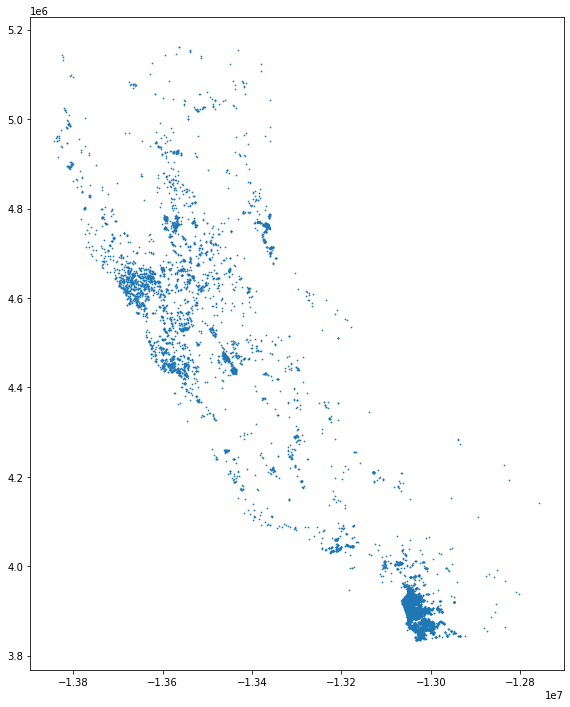

In [18]:
# make sure it plots with basic geopandas plot before doing the next steps 

CCED_points.plot(figsize=(12,12),
                 markersize=0.5)

## Set up interactive map for easement holder type (whole CA)

,sitename,esmthldr,eholdtyp,county,gis_acres,year_est,geometry,cent_lon,cent_lat
1758,Private Easement,Unknown,Private,El Dorado,64.209305,0,POINT (-13461860.335 4652963.635),-1.346186e+07,4.652964e+06
3450,Unknown or Unnamed,Private Owner,Private,Santa Clara,15.873949,0,POINT (-13563330.696 4500144.833),-1.356333e+07,4.500145e+06
3451,Unknown or Unnamed,Private Owner,Private,Santa Clara,23.982173,0,POINT (-13563931.985 4500789.475),-1.356393e+07,4.500789e+06
3452,Unknown or Unnamed,Private Owner,Private,Santa Clara,7.660879,0,POINT (-13543225.321 4445789.434),-1.354323e+07,4.445789e+06
3454,Unknown or Unnamed,Private Owner,Private,Santa Clara,20.984304,0,POINT (-13555327.294 4488869.299),-1.355533e+07,4.488869e+06


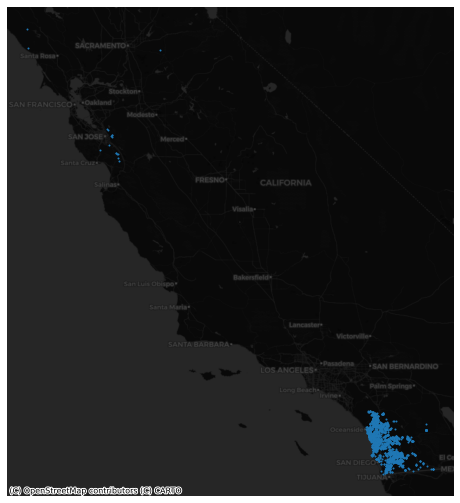

In [19]:
# table
display(CCED_points[CCED_points.eholdtyp == 'Private'].head()) 

# map
ax = CCED_points[CCED_points.eholdtyp == 'Private'].plot(figsize=(9,9), markersize=1)

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

In [20]:
# I know there are less than 10 eholdtyp unique values so I will do all of them 

eholdtyp_all = CCED_points.eholdtyp.value_counts().index.tolist()
eholdtyp_all

['Unknown',
 'NonProfit',
 'Private',
 'Association',
 'Federal',
 'Special District',
 'State',
 'City',
 'County',
 'Government',
 'JPA']

In [21]:
# make the interactive box with the function

@interact
def eholdtyp_by(eholdtyp=eholdtyp_all):
    display(CCED_points[(CCED_points.eholdtyp == 'eholdtyp')].head())
    ax = CCED_points[(CCED_points.eholdtyp == eholdtyp)].plot(figsize=(9,9), markersize=2)
    ax.axis('off')
    ctx.add_basemap(ax)

interactive(children=(Dropdown(description='eholdtyp', options=('Unknown', 'NonProfit', 'Private', 'Associatio…

## Make maps zoomed in to specific counties
### Interactive Widget

In [23]:
# make the interactive dropdown have eholdtyp and county so data can be zoomed in.
# a little inconvenient because not all counties have all the eholdtyp represented

@interact
def eholdtyp_by(eholdtyp=eholdtyp_all,county=CCED_points.county.unique().tolist()):
    display(CCED_points[(CCED_points.eholdtyp == 'eholdtyp')&(CCED_points.county=='county')].head())
    ax = CCED_points[(CCED_points.eholdtyp == eholdtyp)&(CCED_points.county==county)].plot(figsize=(9,9), markersize=1)
    ax.axis('off')
    ctx.add_basemap(ax)


interactive(children=(Dropdown(description='eholdtyp', options=('Unknown', 'NonProfit', 'Private', 'Associatio…

This one isn't super convenient because not all the counties have all the kinds of easements. It is helpful for looking at counties that I know have the most easements, such as San Diego or Sonoma. However, it doesn't show all the easements color coded by holder type at once. For that, I will do the following process:

### Function using County boundaries

In [24]:
# import county boundaries geojson

cbounds = gpd.read_file('../data/counties-2012simple.json')

In [25]:
# only use the county name and geometry so it can be merged onto the CCED_points dataframe

cbounds=cbounds[['name','geometry']].copy()

In [26]:
# change to webmercator projection

cbounds = cbounds.to_crs(epsg=3857)

In [27]:
cbounds.head()

,name,geometry
0,Alameda,"MULTIPOLYGON (((-13615813.516 4564932.526, -13..."
1,Alpine,"POLYGON ((-13366397.536 4679184.485, -13366396..."
2,Amador,"POLYGON ((-13472693.178 4648773.137, -13472696..."
3,Butte,"POLYGON ((-13567535.937 4765254.592, -13562672..."
4,Calaveras,"POLYGON ((-13455860.001 4583508.370, -13453239..."


In [28]:
CCED_trimmed.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

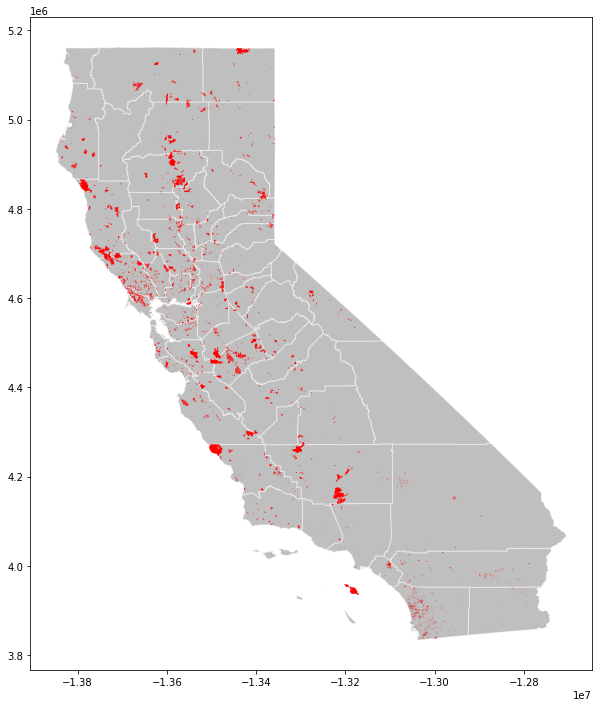

In [29]:
# see if the easements will plot ontop of the county boundaries 

base=cbounds.plot(figsize=(12,12),
                 color='gray',
                 edgecolor='white',
                 alpha=0.5)
ax=CCED_trimmed.plot(ax=base, color='red')

ax.axis=('off')


In [30]:
# set up function to look at the easement polygons with a black basemap for whatever county you query
# use the CCED_trimmed dataframe because that was the iteration before I added the centroids

def map_eas_by_county(place='San Diego'):
    
    county = cbounds[cbounds.name==place]

    minx, miny, maxx, maxy = county.geometry.total_bounds

    eas_in_cbounds = gpd.sjoin(CCED_trimmed,county,how='inner')

    base = county.plot(figsize=(12,12),
                            color='red',
                            edgecolor='red',
                            alpha=0.1)

    ax = eas_in_cbounds.plot(ax=base,
                            column='eholdtyp',
                            markersize=40,
                            legend=True,
                            cmap='tab20'
                        )

    ax.set_xlim(minx - 200, maxx + 200)
    ax.set_ylim(miny - 200, maxy + 200)

    ax.axis('off')

    ax.set_title('Easements on Private Land in '+county.name.values[0]+' County, California',fontsize=20)
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

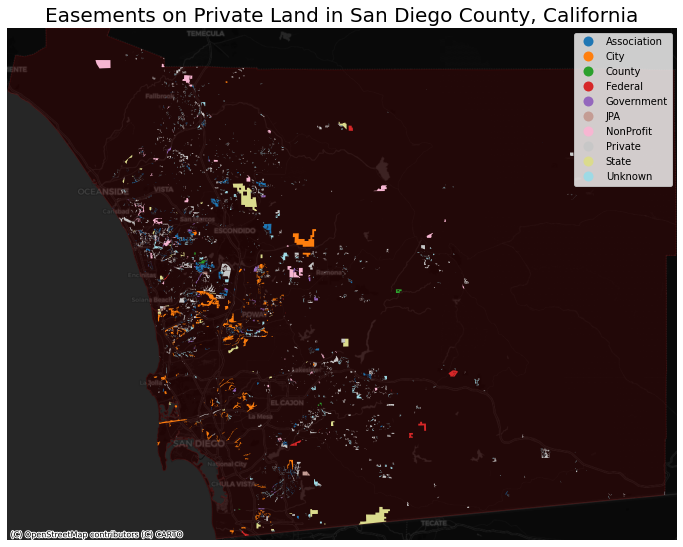

In [31]:
# try it with San Diego County

map_eas_by_county(place='San Diego')

In [32]:
# make a version that uses the centroids too because a lot of easements are too small
# use a color basemap instead of black because it shows how the easement placement interacts with the urban areas and topo
# use the CCED_points dataframe because it includes the centroids 

def map_eas_by_county_points (place='San Diego'):
    
    county = cbounds[cbounds.name==place]

    minx, miny, maxx, maxy = county.geometry.total_bounds

    eas_in_cbounds = gpd.sjoin(CCED_points,county,how='inner')

    base = county.plot(figsize=(12,12),
                            color='red',
                            edgecolor='red',
                            alpha=0.1)

    ax = eas_in_cbounds.plot(ax=base,
                            column='eholdtyp',
                            markersize=20,
                            legend=True,
                            cmap='tab20'
                        )

    ax.set_xlim(minx - 200, maxx + 200)
    ax.set_ylim(miny - 200, maxy + 200)

    ax.axis('off')

    ax.set_title('Easements on Private Land in '+county.name.values[0]+' County, California',fontsize=20)
    ctx.add_basemap(ax)

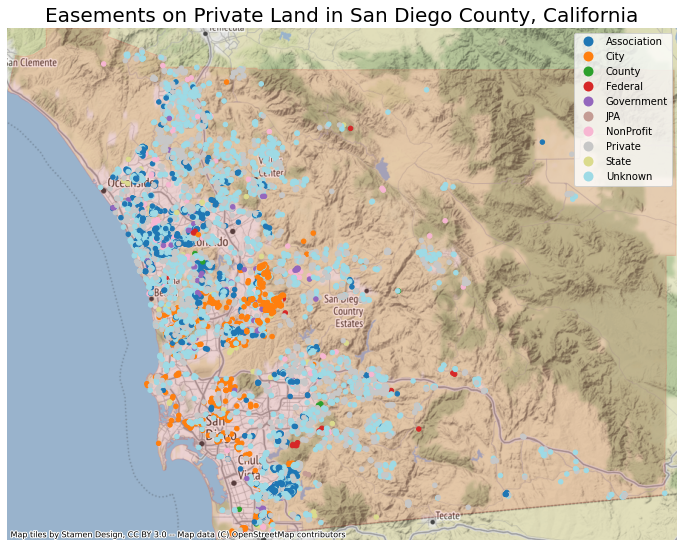

In [33]:
map_eas_by_county_points (place='San Diego')

# Clusters and Central Tendency 

## Look at spatial distribution of easements in the state

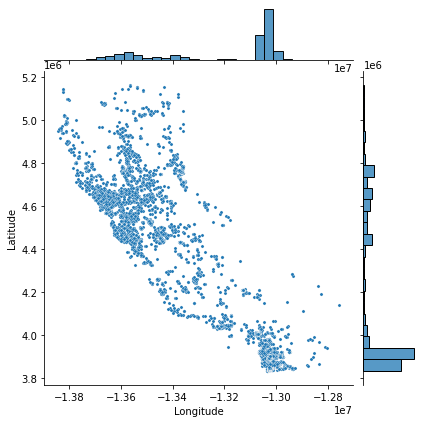

In [37]:
# take a look at the distribution in the state by east-west and north-south

g = sns.jointplot(data = CCED_points,
                  x='cent_lon', 
                  y='cent_lat',
                  s=10)
g.set_axis_labels('Longitude', 'Latitude')

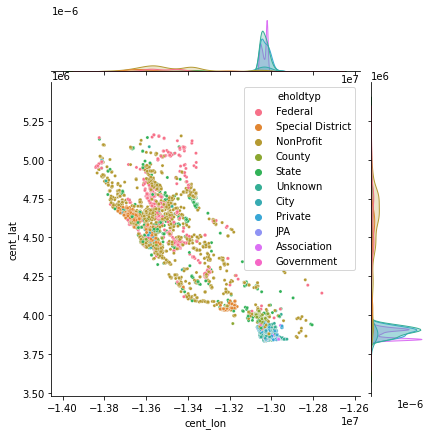

In [38]:
# try with the different eholdtyp

g = sns.jointplot(data = CCED_points,
                  x='cent_lon', 
                  y='cent_lat',
                  hue='eholdtyp',
                  s=10)

### Do the KDE plot of distribution of all easements

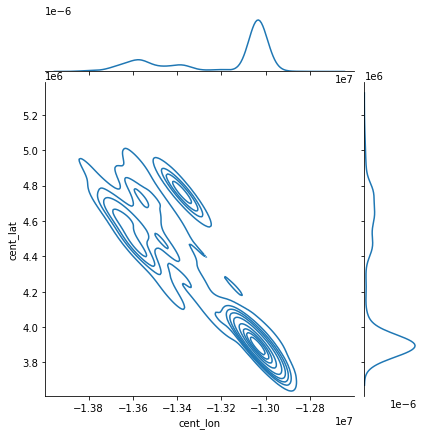

In [39]:
# kde plot
sns.jointplot(data = CCED_points,
              x='cent_lon', 
              y='cent_lat', 
              kind='kde')

### Heat Map

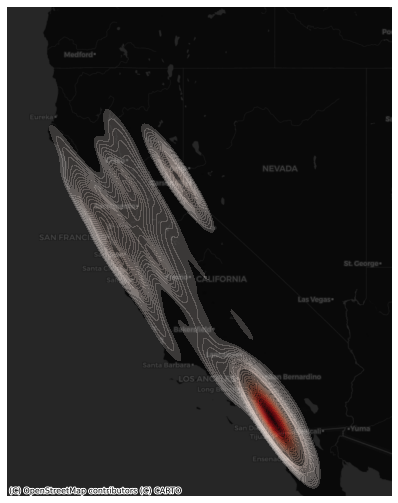

In [40]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# kdeplot, i.e. heat map
sns.kdeplot(x = CCED_points.cent_lon, 
            y = CCED_points.cent_lat,
            n_levels=50, 
            shade=True,
            thresh=0.05,
            alpha=0.2, 
            cmap='Reds')

# axes
ax.axis('off')

# basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

Obviously this is skewed towards San Diego because the county has over half of all the easements in the dataset.

## Central Tendency Measures and Maps

### All easement holder types together

In [41]:
# compute the mean and median centers
mean_center = centrography.mean_center(CCED_points[['cent_lon','cent_lat']])
med_center = centrography.euclidean_median(CCED_points[['cent_lon','cent_lat']])

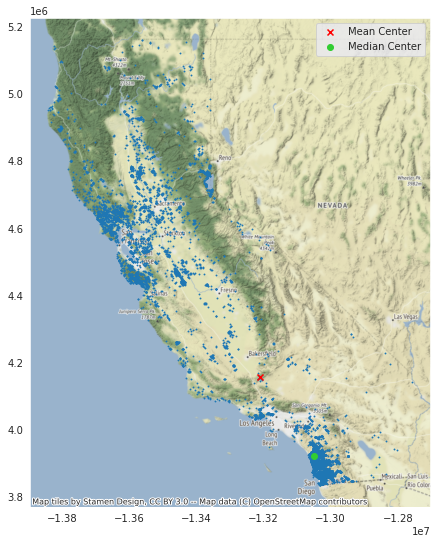

In [42]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(CCED_points['cent_lon'], CCED_points['cent_lat'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

ax.legend()

# add a basemap
ctx.add_basemap(ax)
# Display
plt.show()

Since SD has over 7,000, it makes sense that the median center is located there. I don't feel that either of these measures is particularly meaningful.

In [43]:
major, minor, rotation = centrography.ellipse(CCED_points[['cent_lon','cent_lat']])

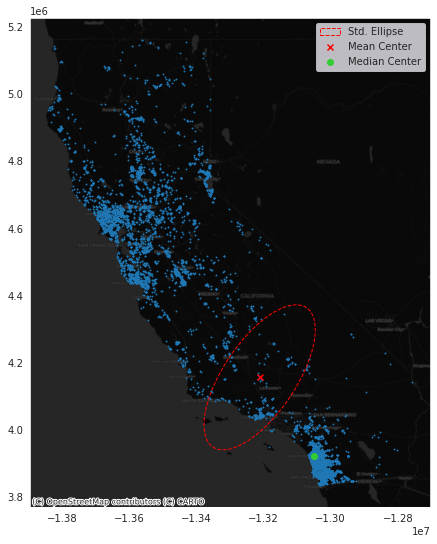

In [44]:
# do a version with an elipse 

# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(CCED_points['cent_lon'], CCED_points['cent_lat'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

# Display
plt.show()

I don't really understand why the ellipsis is wide instead of long, but I double checked and I'm pretty sure I put lat and lon in the right place, or else the points would be messed up on the CA map

### Heat Map that separates by eholdtyp using interactive widget to make it easier

In [45]:
# make a version that you can select the eholdtyp. This will make it easy to see relationships without too much
# interference from San Diego, which has the bulk of "Unknown" 

@interact
def CCED_ellipse(eholdtyp=CCED_points.eholdtyp.unique().tolist()):
    # filter the data by race
    CCED_filtered = CCED_points[CCED_points.eholdtyp == eholdtyp]

    # mean center and median
    mean_center = centrography.mean_center(CCED_filtered[['cent_lon','cent_lat']])
    med_center = centrography.euclidean_median(CCED_filtered[['cent_lon','cent_lat']])

    # standard ellipse
    major, minor, rotation = centrography.ellipse(CCED_filtered[['cent_lon','cent_lat']])

    # Set up figure and axis
    f, ax = plt.subplots(1, figsize=(9, 9))

    # plot easement points
    ax.scatter(CCED_filtered['cent_lon'], CCED_filtered['cent_lat'], s=0.75)

    # add the mean and median center points
    ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
    ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

    # heatmap
    sns.kdeplot(x = CCED_filtered.geometry.x, 
                y = CCED_filtered.geometry.y,
                n_levels=20, 
                shade=False,
                thresh=0.1,
                alpha=0.3, 
                cmap='Reds', 
                ax=ax)

    # Construct the standard ellipse using matplotlib
    ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                      width=major*2, # centrography.ellipse db_filtered
                      height=minor*2, 
                      angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                      facecolor='none', 
                      edgecolor='red', linestyle='--',
                      label='Std. Ellipse')

    ax.add_patch(ellipse)

    ax.legend()

    ax.axis('Off')

    ax.set_title(str(len(CCED_filtered)) + ' easements on private land held by "' + eholdtyp + '" easement holder')

    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)
    # Display
    plt.show()

interactive(children=(Dropdown(description='eholdtyp', options=('Federal', 'Special District', 'NonProfit', 'C…

I think this interactive map is actually quite telling. Some conclusions I can draw:

Federal: concentrated in the north, probably forested areas 

Special Districts: biggest concentration in NorCal, but a cluster in San Diego as well. I know there are well-established open 
space districts in NorCal, such as the Santa Clara Open Space Authority. The Central Valley is noticeably empty

Noprofits: pretty good spread throughout the state, though again clustered in NorCal and SD. Most concentration around Lake Tahoe, wonder why

County: Two clusters, one around the Central Coast and the other appears to be Los Angeles County. Again, Central Valley is empty.

Private: mostly concentrated in San Diego County. Maybe SD county is the only one who keeps decent records of privately established easements.